Understanding with data set -> MNIST

 -> 28 * 28 = 784 inputs 

 -> 10 outputs
 

# Past one: DATA

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# MNIST IMAGE --> Tensors 

In [22]:
transform = transforms.ToTensor()

In [23]:
train_data = datasets.MNIST(root="./Data", train=True, download=True, transform=transform)

In [24]:
test_data = datasets.MNIST(root="./Data", train=False, transform=transform)

In [25]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [26]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [27]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [28]:
print(type(train_data[0]))
type(train_data[0])

<class 'tuple'>


tuple

In [29]:
image, label = train_data[0]
print(image.shape, label) 
# gray scale image 

torch.Size([1, 28, 28]) 5


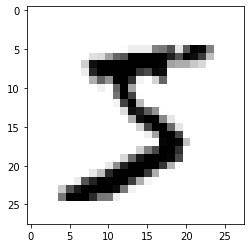

In [33]:
plt.imshow(image.reshape((28,28)),cmap="gist_yarg") #gray

In [34]:
# Create data loader 
torch.manual_seed(42)

# 0 images, 1images 
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=True)

In [35]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}')) # Formatting

In [37]:
# First batch
for images, labels in train_loader:
    # 60,000 / 100 => 60times
    break

In [38]:
print(images.shape) # 100 image 

torch.Size([100, 1, 28, 28])


In [39]:
labels.shape

torch.Size([100])

Labels:  [   9    9    4    7    7    9    4    7    9    1    7    5]


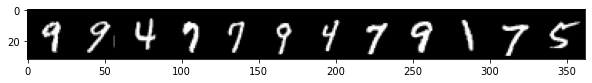

In [40]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# Part two: Model

*1) Design model (input size, output size, forward pass)*

*2) Construct loss and optimizer*

*3) Training loop*

*- forward pass: compute prediction*

*- backward pass: gradients*

*- update weights*

*Done!!!*

In [41]:
class MutilayerPercepton(nn.Module):
    """Some Information about MutilayerPercepton"""
    def __init__(self, input_size = 784, output_size = 10, layer=[120,84]) -> None:
        super(MutilayerPercepton, self).__init__()

        self.fc1 = nn.Linear(input_size, layer[0])
        self.fc2 = nn.Linear(layer[0], layer[1])
        self.fc3 = nn.Linear(layer[1], output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return F.log_softmax(x,dim=1) # Muti class classification

In [42]:
torch.manual_seed(42)
model = MutilayerPercepton()
model

MutilayerPercepton(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [47]:
# ANN --> CNN
sum_parameter = 0
for param in model.parameters():
    sum_parameter += param.numel()
    print(param.numel())
# input -> Dense -> Dense -> Out
print(f"sum parameter : {sum_parameter} parameter")

94080
120
10080
84
840
10
sum parameter : 105214 parameter


In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [49]:
images.shape # ---> [100, 784]

torch.Size([100, 1, 28, 28])

In [51]:
print(images.view(100,-1).shape)
images.view(100,-1)
# -1 => 1 * 28 *28 

torch.Size([100, 784])


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# Part three : Training

In [54]:
import time 
import tqdm
start_time = time.time()
# Training 
epochs = 10 

# Tracker 
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for batch, (X_train, y_train) in enumerate(train_loader):
        batch += 1

        # 10 Neurons
        # [0.1, 0.0, ..., 0.8] -> 0.9
        y_pred = model(X_train.view(100,-1)) 
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred,1)[1] #print(y_pred)
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%200 == 0:
            accuracy = trn_corr.item()*100/ (100*batch)
            print(f'Epoch {i} batch{batch} loss:{loss.item()} accuracy: {accuracy}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_loader):

            y_val = model(X_test.view(500,-1))

            predicted = torch.max(y_val,1)[1]
            tst_corr += (predicted==y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
total_time = time.time() - start_time

print(f"Duration: {total_time/60} mins")
print("Done")

Epoch 0 batch200 loss:0.14462952315807343 accuracy: 95.435
Epoch 0 batch400 loss:0.09354814887046814 accuracy: 95.725
Epoch 0 batch600 loss:0.1792767494916916 accuracy: 95.885
Epoch 1 batch200 loss:0.06854995340108871 accuracy: 96.825
Epoch 1 batch400 loss:0.05639141425490379 accuracy: 96.9675
Epoch 1 batch600 loss:0.10564718395471573 accuracy: 97.055
Epoch 2 batch200 loss:0.10485707223415375 accuracy: 97.61
Epoch 2 batch400 loss:0.10683687031269073 accuracy: 97.7275
Epoch 2 batch600 loss:0.03789285197854042 accuracy: 97.75
Epoch 3 batch200 loss:0.08586447685956955 accuracy: 98.26
Epoch 3 batch400 loss:0.06300896406173706 accuracy: 98.22
Epoch 3 batch600 loss:0.07510429620742798 accuracy: 98.185
Epoch 4 batch200 loss:0.03313601762056351 accuracy: 98.43
Epoch 4 batch400 loss:0.09243930876255035 accuracy: 98.505
Epoch 4 batch600 loss:0.09940264374017715 accuracy: 98.47666666666667
Epoch 5 batch200 loss:0.01690082810819149 accuracy: 98.81
Epoch 5 batch400 loss:0.08224711567163467 accuracy

# Part Four: Evaluation

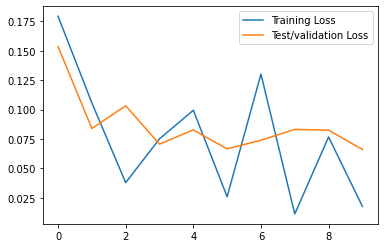

In [59]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Test/validation Loss")
plt.legend()

In [66]:
train_accuracy = [t/600 for t in train_correct] # 600
test_accuracy = [t/100 for t in test_correct] # 600


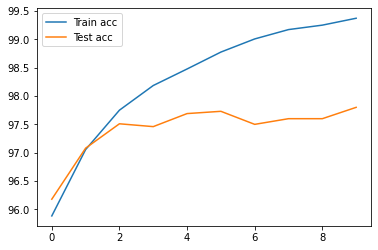

In [68]:
plt.plot(train_accuracy, label="Train acc")
plt.plot(test_accuracy, label="Test acc")
plt.legend()

In [69]:
# New unseen data
test_load_all = DataLoader(test_data,batch_size=10000, shuffle=False)

In [70]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted==y_test).sum()

In [75]:
print(f'Acc for unseen data : {correct.item()/len(test_data)*100}')

Acc for unseen data : 97.8


In [76]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 969,    0,    3,    0,    1,    2,    1,    1,    2,    0],
       [   0, 1115,    0,    0,    0,    0,    2,    1,    0,    3],
       [   0,    3, 1000,    1,    3,    0,    1,    8,    2,    0],
       [   2,    3,   11, 1004,    1,   14,    1,    3,   15,    4],
       [   1,    0,    1,    0,  951,    1,    3,    1,    3,    3],
       [   1,    0,    0,    0,    0,  861,    2,    0,    1,    3],
       [   2,    4,    2,    0,    6,    7,  943,    0,    2,    1],
       [   0,    4,    5,    2,    3,    1,    0, 1004,    2,    3],
       [   2,    5,   10,    2,    1,    5,    5,    3,  941,    0],
       [   3,    1,    0,    1,   16,    1,    0,    7,    6,  992]],
      dtype=int64)